# Working with Heat Transfer Fluids - Therminol LT

Heat transfer fluids are pure species or chemical mixtures with specially tailored properties that make them suitable for use in heat exchangers. Usually this means not fouling, requiring little heat transfer area because of a high heat capacity, thermal conductivity, and potentially high density and low flammability. 

Therminol LT is a fluid chosen for the demonstration. It is in fact a pure chemical, 1,2-diethylbenzene. 

The data comes from therminol itself, in the following PDF.

https://web.archive.org/web/20210615044602/https://www.therminol.com/sites/therminol/files/documents/TF-8726_Therminol_LT.pdf

In [1]:
from fluids.core import C2K, F2K
from fluids.constants import R
import numpy as np
from chemicals import rho_to_Vm, Vm_to_rho, property_mass_to_molar, omega_definition, simple_formula_parser, similarity_variable, molecular_weight
from thermo import (TDependentProperty, VaporPressure, VolumeLiquid, ChemicalConstantsPackage, PropertyCorrelationsPackage,
                    HeatCapacityLiquid, HeatCapacityGas, ThermalConductivityLiquid, 
                    ThermalConductivityGas, ViscosityGas, ViscosityLiquid, EnthalpyVaporization,
                    SurfaceTension)
name = '1,2-diethylbenzene'
CAS = "25340-17-4"
formula = "C10H14"
atoms = simple_formula_parser(formula)
sv = similarity_variable(atoms)
MW = molecular_weight(atoms)

Tc = 377.0 + 273.15
Pc = 34.5e5
rhoc_mass = 298.0 # kg/m^3
Vc = rho_to_Vm(rhoc_mass, MW)
Zc = Pc*Vc/(R*Tc)

Tm = C2K(-75.0)

Ts = [-73, -62, -51, -40, -29, -18, -7, 4, 16, 27, 38, 49, 60, 71, 82, 93, 104, 116, 127, 138, 149, 160, 171, 181, 182, 193, 204, 216, 227, 238, 249, 260, 271, 282, 293, 304, 316]
Ts = [C2K(v) for v in Ts]

Psats = [ 0.002, 0.006, 0.016, 0.038, 0.084, 0.175, 0.345, 0.649, 1.17, 2.02, 3.37, 5.43, 8.51, 13.0, 19.3, 28.1, 40.1, 56.1, 77.1, 101, 104, 139, 183, 237, 304, 386, 484, 601, 740, 904, 1090, 1310, 1570]
Psats = [v*1e3 for v in Psats] # kPa to Pa
Ts_Psats = Ts[len(Ts)-len(Psats):]

# Obtain the acentric factor from linear interpolation for convenience
Psat_07 = float(np.interp(0.7*Tc, Ts_Psats, Psats))
omega = omega_definition(Psat_07, Pc)

# Interpolate on pressure to find the normal boiling point
Tb = float(np.interp(101325.0, Psats, Ts_Psats))

rhols_mass = [938, 930, 921, 913, 904, 896, 887, 878, 869, 860, 852, 843, 833, 824, 815, 806, 796, 786, 776, 766, 756, 746, 735, 726, 724, 713, 702, 690, 678, 666, 652, 639, 625, 610, 594, 576, 558]
Vms = [rho_to_Vm(rho, MW) for rho in rhols_mass]

Cpls_mass = [1.44, 1.48, 1.53, 1.57, 1.61, 1.66, 1.70, 1.74, 1.78, 1.83, 1.87, 1.91, 1.95, 1.99, 2.03, 2.07, 2.11, 2.15, 2.19, 2.23, 2.27, 2.30, 2.34, 2.38, 2.38, 2.42, 2.46, 2.50, 2.54, 2.58, 2.63, 2.67, 2.72, 2.78, 2.84, 2.91, 3.01]
Cpls_mass = [v*1000 for v in Cpls_mass] # kJ/(kg*K)
Cpls = [property_mass_to_molar(Cp, MW) for Cp in Cpls_mass] # J/(mol*K)

Cpgs_mass = [0.766, 0.813, 0.860, 0.908, 0.955, 1.002, 1.049, 1.095, 1.142, 1.188, 1.234, 1.280, 1.325, 1.370, 1.415, 1.459, 1.503, 1.547, 1.590, 1.634, 1.676, 1.719, 1.761, 1.799, 1.803, 1.845, 1.886, 1.928, 1.970, 2.012, 2.055, 2.099, 2.144, 2.191, 2.241, 2.297, 2.362]
Cpgs_mass = [v*1000 for v in Cpgs_mass] # kJ/(kg*K)
Cpgs = [property_mass_to_molar(Cp, MW) for Cp in Cpgs_mass] # J/(mol*K)


kls = [0.1426, 0.1405, 0.1384, 0.1362, 0.1341, 0.1320, 0.1298, 0.1277, 0.1255, 0.1233, 0.1212, 0.1190, 0.1168, 0.1146, 0.1124, 0.1102, 0.1080, 0.1058, 0.1036, 0.1013, 0.0991, 0.0968, 0.0946, 0.0926, 0.0923, 0.0901, 0.0878, 0.0855, 0.0832, 0.0810, 0.0786, 0.0763, 0.0740, 0.0717, 0.0694, 0.0670, 0.0647]
muls = [10.09, 6.03, 3.99, 2.84, 2.13, 1.67, 1.35, 1.12, 0.947, 0.814, 0.708, 0.624, 0.554, 0.496, 0.447, 0.405, 0.369, 0.338, 0.310, 0.286, 0.265, 0.246, 0.229, 0.215, 0.213, 0.199, 0.187, 0.175, 0.165, 0.155, 0.146, 0.138, 0.131, 0.124, 0.117, 0.112, 0.106]
muls = [v*1e-3 for v in muls] # mPa*s to Pa*s

Hvaps_mass = [492.7, 485.2, 477.8, 470.4, 463.0, 455.7, 448.5, 441.3, 434.1, 427.0, 420.0, 412.9, 405.9, 399.0, 392.1, 385.2, 378.4, 371.6, 364.7, 357.9, 351.0, 344.1, 337.2, 330.9, 330.1, 323.0, 315.7, 308.2, 300.5, 292.5, 284.3, 275.6, 266.4, 256.7, 246.2, 234.7, 221.8]
Hvaps_mass = [v*1000 for v in Hvaps_mass] # kJ/(kg)
Hvaps = [property_mass_to_molar(Hvap, MW) for Hvap in Hvaps_mass] # J/(mol)

kgs = [ 0.0051, 0.0057, 0.0063, 0.0069, 0.0075, 0.0082, 0.0088, 0.0095, 0.0101, 0.0108, 0.0115, 0.0122, 0.0130, 0.0137, 0.0144, 0.0152, 0.0160, 0.0168, 0.0176, 0.0184, 0.0192, 0.0200, 0.0209, 0.0216, 0.0217, 0.0226, 0.0235, 0.0244, 0.0253, 0.0262, 0.0272, 0.0281, 0.0291, 0.0301, 0.0310, 0.0321, 0.0331]

mugs = [0.00434, 0.00458, 0.00482, 0.00506, 0.00530, 0.00554, 0.00578, 0.00603, 0.00628, 0.00652, 0.00677, 0.00702, 0.00727, 0.00752, 0.00777, 0.00802, 0.00828, 0.00853, 0.00878, 0.00903, 0.00928, 0.00952, 0.00977, 0.01000, 0.01002, 0.01027, 0.01051, 0.01076, 0.01100, 0.01124, 0.01148, 0.01172, 0.01196, 0.01220, 0.01243, 0.01267, 0.01290]
mugs = [v*1e-3 for v in mugs] # mPa*s to Pa*s

sigmas = [0.028, 0.0]
sigma_Ts = [298.15, Tc]

prop_kwargs = {'Tc': Tc, 'Pc': Pc, 'Vc': Vc, 'Zc': Zc, 'omega': omega,
               'MW': MW, 'Tb': Tb, 'Tm': Tm, 'CASRN': CAS}
prop_kwargs = {} # Comment this out to show the estimation method results

plot_kwargs = {'pts': 30, 'Tmin': Ts[0]}


Now that the data has been added into Python objects, we can fit them to equations. The plots below show how good the fits are.

/home/caleb/.local/lib/python3.9/site-packages/scipy/optimize/minpack.py:475: RuntimeWarning: Number of calls to function has reached maxfev = 500.
  warnings.warn(errors[info][0], RuntimeWarning)


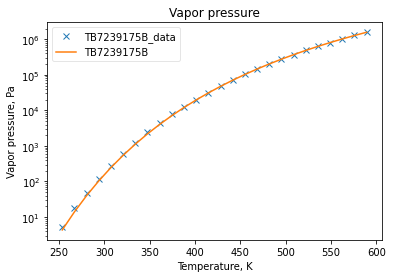

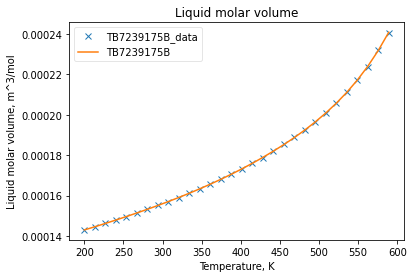

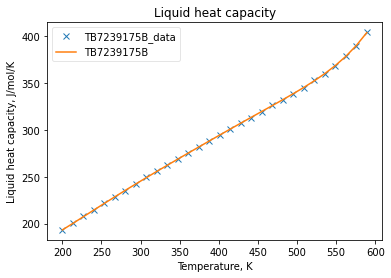

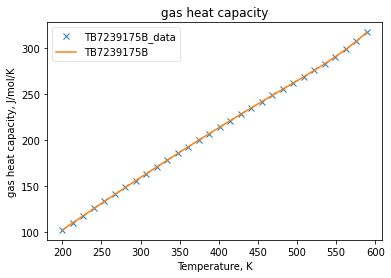

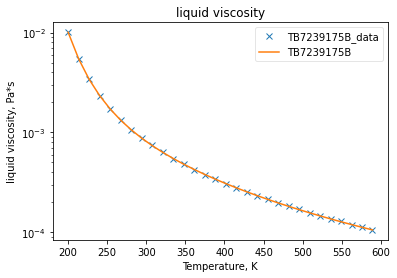

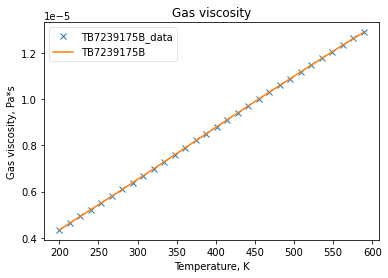

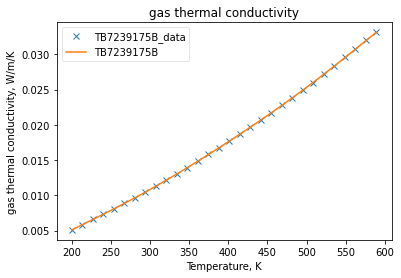

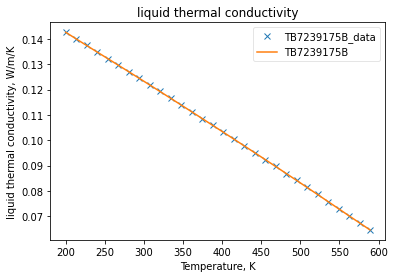

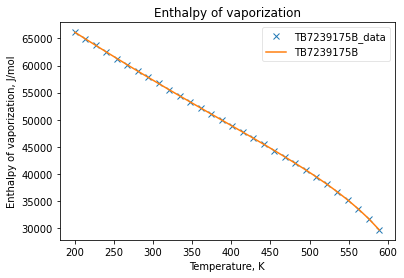

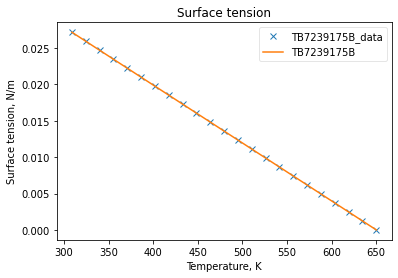

In [2]:
source = 'TB7239175B'
plot = True
PsatObj = VaporPressure(**prop_kwargs)
PsatObj.fit_add_model(Ts=Ts_Psats, data=Psats, model='DIPPR101', name=source)

VolLiqObj = VolumeLiquid(**prop_kwargs)
VolLiqObj.fit_add_model(Ts=Ts, data=Vms, model='DIPPR100', name=source)

CpLiqObj = HeatCapacityLiquid(**prop_kwargs)
CpLiqObj.fit_add_model(Ts=Ts, data=Cpls, model='DIPPR100', name=source)

CpGasObj = HeatCapacityGas(**prop_kwargs)
CpGasObj.fit_add_model(Ts=Ts, data=Cpgs, model='DIPPR100', name=source)

MuLiqObj = ViscosityLiquid(**prop_kwargs)
MuLiqObj.fit_add_model(Ts=Ts, data=muls, model='mu_TDE', name=source)

MuGasObj = ViscosityGas(**prop_kwargs)
MuGasObj.fit_add_model(Ts=Ts, data=mugs, model='DIPPR100', name=source)

KGasObj = ThermalConductivityGas(**prop_kwargs)
KGasObj.fit_add_model(Ts=Ts, data=kgs, model='DIPPR100', name=source)

KLiqObj = ThermalConductivityLiquid(**prop_kwargs)
KLiqObj.fit_add_model(Ts=Ts, data=kls, model='DIPPR100', name=source)

HvapObj = EnthalpyVaporization(**prop_kwargs)
HvapObj.fit_add_model(Ts=Ts, data=Hvaps, model_kwargs={'Tc': Tc}, model='PPDS12', name=source)

SigmaObj = SurfaceTension(**prop_kwargs)
SigmaObj.fit_add_model(Ts=sigma_Ts, data=sigmas, model_kwargs={'Tc': Tc}, model='linear', name=source)

if plot:
    PsatObj.plot_T_dependent_property(axes='semilogy', **plot_kwargs)
    VolLiqObj.plot_T_dependent_property(axes='plot', **plot_kwargs)
    CpLiqObj.plot_T_dependent_property(axes='plot', **plot_kwargs)
    CpGasObj.plot_T_dependent_property(axes='plot', **plot_kwargs)
    MuLiqObj.plot_T_dependent_property(axes='semilogy', **plot_kwargs)
    MuGasObj.plot_T_dependent_property(axes='plot', **plot_kwargs)
    KGasObj.plot_T_dependent_property(axes='plot', **plot_kwargs)
    KLiqObj.plot_T_dependent_property(axes='plot', **plot_kwargs)
    HvapObj.plot_T_dependent_property(axes='plot', **plot_kwargs)
    SigmaObj.plot_T_dependent_property(axes='plot', **plot_kwargs)

In [3]:
Vml_60F = VolLiqObj(F2K(60), None)
rhol_60Fs_mass = Vm_to_rho(Vml_60F, MW)

Vml_STP = VolLiqObj(298.15, None)
rhol_STPs_mass = Vm_to_rho(Vml_STP, MW)

constants = ChemicalConstantsPackage(Tcs=[Tc], Pcs=[Pc], Vcs=[Vc], Zcs=[Zc], omegas=[omega], MWs=[MW],
                                     Vml_60Fs=[Vml_60F], rhol_60Fs=[1/Vml_60F], rhol_60Fs_mass=[rhol_60Fs_mass],
                                     Vml_STPs=[Vml_STP], rhol_STPs_mass=[rhol_STPs_mass],
                                     similarity_variables=[sv])
correlations = PropertyCorrelationsPackage(constants=constants, VaporPressures=[PsatObj], VolumeLiquids=[VolLiqObj],
                                        HeatCapacityLiquids=[CpLiqObj], HeatCapacityGases=[CpGasObj],
                                        ViscosityLiquids=[MuLiqObj], ViscosityGases=[MuGasObj],
                                        ThermalConductivityGases=[KGasObj], ThermalConductivityLiquids=[KLiqObj],
                                        EnthalpyVaporizations=[HvapObj], SurfaceTensions=[SigmaObj])

Now that the ChemicalConstantsPackage and PropertyCorrelationsPackage have been created, we are ready to make packages and do calculations with them.

In [4]:
from thermo import ChemicalConstantsPackage, PRMIX, CEOSLiquid, CEOSGas, FlashPureVLS
eos_kwargs = dict(Tcs=constants.Tcs, Pcs=constants.Pcs, omegas=constants.omegas)

liquid = CEOSLiquid(PRMIX, HeatCapacityGases=correlations.HeatCapacityGases, eos_kwargs=eos_kwargs)
gas = CEOSGas(PRMIX, HeatCapacityGases=correlations.HeatCapacityGases, eos_kwargs=eos_kwargs)
flasher_PR = FlashPureVLS(constants, correlations, gas=gas, liquids=[liquid], solids=[])
print(flasher_PR.flash(T=300, P=1e5))

<EquilibriumState, T=300.0000, P=100000.0000, zs=[1.0], betas=[1.0], phases=[<CEOSLiquid, T=300 K, P=100000 Pa>]>


In [5]:
from thermo.phases import GibbsExcessLiquid, IdealGas
liquid = GibbsExcessLiquid(VaporPressures=correlations.VaporPressures, VolumeLiquids=correlations.VolumeLiquids,
                 HeatCapacityGases=correlations.HeatCapacityGases, equilibrium_basis='Psat')
gas = IdealGas(HeatCapacityGases=correlations.HeatCapacityGases)
flasher_ideal = FlashPureVLS(constants, correlations, gas=gas, liquids=[liquid], solids=[])
print(flasher_ideal.flash(T=300, P=1e5))

<EquilibriumState, T=300.0000, P=100000.0000, zs=[1.0], betas=[1.0], phases=[<GibbsExcessLiquid, T=300 K, P=100000 Pa>]>


Using a thermodynamically consistent model is much more challenging than directly predicting a property. Liquid heat capacity, heat of vaporization, and density are all particularly challenging properties. The following plots show the accuracy of the models.

In [9]:
Cpls_calc_PR = []
Cpls_calc_ideal = []
for T in Ts:
    Cpls_calc_PR.append(flasher_PR.flash(T=T, VF=0).Cp())
    Cpls_calc_ideal.append(flasher_ideal.flash(T=T, VF=0).Cp())
    
Hvaps_calc_PR = []
Hvaps_calc_ideal = []
for T in Ts:
    Hvaps_calc_PR.append(flasher_PR.flash(T=T, VF=1).H() - flasher_PR.flash(T=T, VF=0).H())
    Hvaps_calc_ideal.append(flasher_ideal.flash(T=T, VF=1).H() - flasher_ideal.flash(T=T, VF=0).H())
    
Vl_calc_PR = []
Vl_calc_ideal = []
for T in Ts:
    Vl_calc_PR.append(flasher_PR.flash(T=T, VF=0).V())
    Vl_calc_ideal.append(flasher_ideal.flash(T=T, VF=0).V())

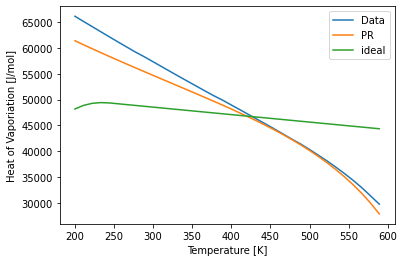

In [7]:
import matplotlib.pyplot as plt
plt.plot(Ts, Hvaps, label='Data')
plt.plot(Ts, Hvaps_calc_PR, label='PR')
plt.plot(Ts, Hvaps_calc_ideal, label='ideal')
plt.xlabel("Temperature [K]")
plt.ylabel("Heat of Vaporiation [J/mol]")
plt.legend()
plt.show()

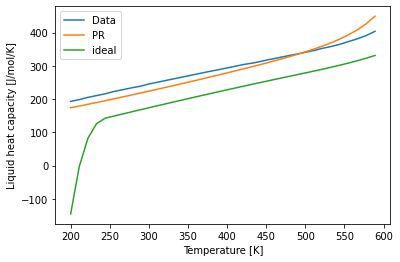

In [8]:
import matplotlib.pyplot as plt
plt.plot(Ts, Cpls, label='Data')
plt.plot(Ts, Cpls_calc_PR, label='PR')
plt.plot(Ts, Cpls_calc_ideal, label='ideal')
plt.xlabel("Temperature [K]")
plt.ylabel("Liquid heat capacity [J/mol/K]")
plt.legend()
plt.show()

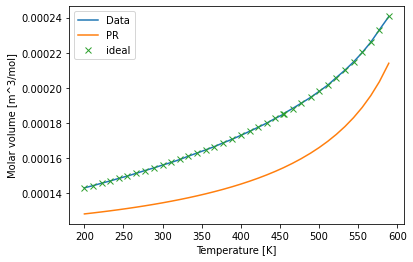

In [11]:
import matplotlib.pyplot as plt
plt.plot(Ts, Vms, label='Data')
plt.plot(Ts, Vl_calc_PR, label='PR')
plt.plot(Ts, Vl_calc_ideal, 'x', label='ideal')
plt.xlabel("Temperature [K]")
plt.ylabel("Molar volume [m^3/mol]")
plt.legend()
plt.show()